#  Classification Metrics Module 5 Assignment.

## Group members:
    
    - Eli Weiss.
    - Julian Ruggiero.
    - Omar M. Hussein.
    
## Introduction

In this assignment we are going to be creating several functions to measure the classification metrics of our binary classification model including accuracy, precision, recall (sensitivity), specificity and f1 score. Additionally, we will calculate the ROC and AUC and compare it to the ones populated by sklearn prebuilt functions.

The data set was provided along with the assignment instructions.

## Tasks

__1)__ Load the provided M5_Data.csv file to your DAV 6150 Github Repository.

Here we are only going to load the 3 columns that we need for the assignment

__2)__ Then, using a Jupyter Notebook, read the data set from your Github repository and load it into a Pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#I read and save the dataset from my GitHub page using pd.read_csv
df=pd.read_csv('https://raw.githubusercontent.com/enwweiss/DAV-6150/master/M5_Data.csv')

#I print the shape to verify that is the same as the one documented (9568,5)
print(df.shape)
df.head()

(181, 3)


,class,scored.class,scored.probability
0,0,0,0.328452
1,0,0,0.273190
2,1,0,0.109660
3,0,0,0.055998
4,0,0,0.100491


whenever the scored.probability is:
- lower than '0.5', the model predicted a 0 for scored.class column.
- greater than '0.5', the model predicted a 1 for scored.class column.

In [2]:
#checking data types and if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
class                 181 non-null int64
scored.class          181 non-null int64
scored.probability    181 non-null float64
dtypes: float64(1), int64(2)
memory usage: 4.3 KB


- __class:__ the actual classification for the observation<br/>
- __scored.class:__ the predicted classification for the observation (can only be ‘0’ or ‘1’; identified by
comparing the classification model’s probability score (i.e., the likelihood that the correct classification
for an observation is a ‘1’) for the observation against a 0.50 threshold))<br/>
- __scored.probability:__ the classification model’s probability score (i.e., the likelihood that the correct
classification for an observation is a ‘1’) for the observation

__3)__ Use Pandas’ __crosstab()__ function to calculate the contents of a confusion matrix for the data. Make sure you closely examine the output e.g., do the rows represent the actual or the predicted classification? What about the columns? (HINT: A good way to ensure you understand the output of the __crosstab()__ function is to check the __value_counts()__ for the dataframe columns you’ve used as input to the __crosstab()__ function. When observing the __value_counts()__, determine whether the rows or columns in the crosstab() output sum to the respective __value_counts()__ figures).

So here we count the total number of True positives, False positives, False negatives and True negatives.

In this part, we display the False Negative and the True Negative counts.

In [3]:
#checking value counts 
df[df['class'] == 0]['scored.class'].value_counts()

0    119
1      5
Name: scored.class, dtype: int64

In this part, we display the True postive and the False postive counts.

In [4]:
#checking value counts
df[df['class'] == 1]['scored.class'].value_counts()

0    30
1    27
Name: scored.class, dtype: int64

__4)__ Extract the individual confusion matrix values (i.e., True Positive, False Positive, True Negative, False Negative) from the output of the __crosstab()__ function and save them for later use (e.g., save them each to individual variables or to the data structure of your choice). Knowing how to properly extract these values from the output of crosstab() will serve you well throughout the remainder of the assignment

We use the pd.crosstab and provide the actual class and scored.class to get the complete confusion matrix.

In [5]:
CF = pd.crosstab(df['class'],df['scored.class'])
print(CF)

scored.class    0   1
class                
0             119   5
1              30  27


We can see that the values provided by the crosstab function matches the value_counts() in the original from previous task.

__5)__ Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the __accuracy__ metric for the predictions without utilizing any pre-built Python accuracy metric calculation functions.

First define a helper function to be used with several tasks that follows.

In [6]:
def get_confusion_elements(actual_class, predicted_class):
    """Helper function that creates a confusion matrix and return its 4 elements for a
    binary classification"""
    conf_matrix = pd.crosstab(actual_class, predicted_class)

    
    tp = conf_matrix[1][1]
    tn = conf_matrix[0][0]
    fp = conf_matrix[1][0]
    fn = conf_matrix[0][1]
    
    #returns the 4 elements
    return tp,tn,fp,fn

Defining a function to get the accuracy.

In [7]:
def get_classification_accuracy(actual_class, predicted_class):
    """Receives 2 list/series with the actual and predicted classifications 
    for any binary classification data and returns the accuracy metric"""
    
    tp,tn,fp,fn = get_confusion_elements(actual_class, predicted_class)
    
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    return accuracy

In [8]:
#
accuracy = get_classification_accuracy(df['class'],df['scored.class'])
print("Accuracy: ",accuracy)

Accuracy:  0.806629834254


We can se that we have an accuracy of 0.8066

__6)__ Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the __precision__ metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

Defining a function to get the precision.

In [9]:
def classification_precision(actual_class, predicted_class):
    """Receives 2 list/series with the actual and predicted classifications 
    for any binary classification data and returns the precision metric"""
    
    tp,tn,fp,fn = get_confusion_elements(actual_class, predicted_class)
    
    precision = tp / (tp+fp)
    return precision

In [10]:
precision = classification_precision(df['class'],df['scored.class'])
print("Precision: ",precision)

Precision:  0.84375


We achieved a precision of 0.84375

__7)__ Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the __sensitivity__ metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

Defining a function to get the sensitivity

In [11]:
def classification_sensitivity(actual_class, predicted_class):
    """
    Receives 2 list/series with the actual and predicted classifications 
    for any binary classification data and returns the sensitivity metric
    """
    
    tp,tn,fp,fn = get_confusion_elements(actual_class, predicted_class)
    
    sensitivity = tp/(tp+fn)
    return sensitivity

In [12]:
sensitivity = classification_sensitivity(df['class'],df['scored.class'])
print("Sensitivity: ",sensitivity)

Sensitivity:  0.473684210526


We achieved a sensitivity of 0.4736

__8)__ Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the __specificity__ metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

Defining a function to get the specificity.

In [13]:
def classification_specificity(actual_class, predicted_class):
    """
    Receives 2 list/series with the actual and predicted classifications 
    for any binary classification data and returns the specificity metric
    """
    
    tp,tn,fp,fn = get_confusion_elements(actual_class, predicted_class)
    
    specificity = tn/(tn+fn)
    return specificity

In [14]:
specificity = classification_specificity(df['class'],df['scored.class'])
print("Specificity: ",specificity)

Specificity:  0.798657718121


We achieved a specificity of 0.7986

__9)__ Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the __F1 Score__ metric for the predictions without utilizing any pre-built Python classification metric calculation functions.

Defining a function to get the F1 Score.

In [15]:
def classification_f1_score(actual_class, predicted_class):
    """
    Receives 2 list/series with the actual and predicted classifications 
    for any binary classification data and returns the F1 score metric
    """
    
    recall = classification_sensitivity(actual_class,predicted_class)    
    precision = classification_precision(actual_class,predicted_class)

    f1_score = (2*(recall)*(precision))/(recall+precision)
               
    return f1_score

In [16]:
f1_score = classification_f1_score(df['class'],df['scored.class'])
print("F1 score: ",f1_score)

F1 score:  0.606741573034


We got an F1 score of 0.60674

__10)__ Write a Python function to __plot a ROC curve and also calculate AUC__ for any binary classification data that contains both actual and predicted classifications as well as the associated scored probabilities without utilizing any pre-built Python classification metric calculation or ROC or AUC functions.

To be able to plot the ROC (Receiver Operating Characteristic), we will calculate the true positive rate (TPR) (or Sensitivity) against the false positive rate (FPR).

First we have a helper function that will define the new scored.probability based on the threshold value that it receives as a parameter.

In [17]:
def predict_class(probability,thresh):
    
    '''
    Creates a new column with the new prediction based on the new threshold
    '''
    new_df = pd.DataFrame(probability, columns=['scored.probability'])
    
    new_df[new_df["scored.probability"] >= thresh] = 1
    new_df[new_df["scored.probability"] < thresh] = 0
    
    return new_df["scored.probability"]

Now we define a function that calculates and plot the ROC, with the corresponding AUC value. We defined a starting point of 0, and a specific threshold of 0.5, ending at 1. We choose this threshold to match what sklearn provides in the prebuilt function.  The user might be able to change it to any other lower value (like 0.1), we it will get a greater AUC.

In [18]:
def ROC_and_AUC(actual_class, predicted_class, probability):
    '''
    Function that receives actual and predicted classifications as well as the associated scored probabilities
    for any binary classification model and:
    - Plots the ROC with the True Positive Rate (TPR) and False Positive Rate (FPR) for every threshold step.
    - Calculate the AUC and include it in the ROC plot as a legend
    
    Returns TPR, FPR both as a list with the ROC coordinates and the AUC value.
    '''
    
    #start threshold at zero
    threshold = 0
    
    #define empty list for TPR and FPR
    tpr_list, fpr_list = [],[]
    
    #iterates until threshold > 1
    while threshold <= 1:
        threshold = round(threshold,2)
       
        #call the function to get the new scored.class based on current threshold     
        predicted_class = predict_class(probability,threshold)
        
        #get the set of classes predicted (can be '0', '1' or '0' and '1')
        classes = set(predicted_class)
        
        #check returned classes count
        if (len(classes) == 1):
            
            #has only one class predicted
            if 1 in classes:
                #all predicted classes were 1, set the fpr and tpr to 1
                tpr = 1
                fpr = 1
                
            else: 
                #all predicted classes were 0, set the fpr and tpr to 0
                tpr = 0
                fpr = 0
                
        else: #we have more than one class predicted, get the confusion matrix and the corresponding values
            tpr = classification_sensitivity(actual_class, predicted_class)
            fpr = get_fp_rate(actual_class, predicted_class)
        
        #append calculated tpr and fpr values to corresponding list
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        
        #increase the threshold in 0.05
        threshold += 0.5
    
    #call function to calculate AUC
    auc_value = auc(fpr_list,tpr_list)
    
    # calculate ROC curve using fpr and tpr lists
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr_list, tpr_list, label="AUC = "+str(round(auc_value,4)))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    #adding coordinate legends
    for i_x, i_y in zip(fpr_list, tpr_list):
        i_x = round(i_x,2)
        i_y = round(i_y,2)
        plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
    
    
    plt.show();
    
    return tpr_list, fpr_list, auc_value

We define a function to get the false positive rate (will be in the x axis in our ROC).

In [19]:
def get_fp_rate(actual_class, predicted_class):
    """
    Receives 2 list/series with the actual and predicted classifications 
    for any binary classification data and returns the sensitivity metric
    """
    
    tp,tn,fp,fn = get_confusion_elements(actual_class, predicted_class)
    
    
    rate = fp/(fp+tn)
    #FPR = FP / (FP + TN)
    return rate

Here we define a function a helper function to get an area of a trapezoid. [1]

In [20]:
def trapezoid_rule(x1,x2,y1,y2):
    """
    Implementing the trapezoid rule = Height/2 * width
    y: TPR.
    x: FPR.
    """
    return ((y1+y2)/2) * (x2-x1)

Here we define a function that will calculate the AUC of the area of a small trapezoids and then add all of them up to get the total area. [1]

In [21]:
def auc(fpr,tpr):
    n = len(fpr)

    area = 0
    for i in range(n):
        if i == 0:
            continue
        subarea = trapezoid_rule(fpr[i], fpr[i-1], tpr[i], tpr[i-1])
        area += subarea
    return area

We test our ROC_and_AUC function providing the class, scored.class and scored.probability.

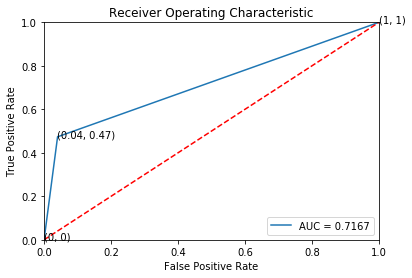

In [22]:
tpr_list, fpr_list, auc = ROC_and_AUC(df['class'], df['scored.class'], df['scored.probability'])

In [23]:
print('AUC value is :', auc)

AUC value is : 0.716680814941


In order to get the AUC we calculated small trapezoidal areas (with the helper function) and the sum them all together to get the full area. <br>
We see the 45° red doted line which shows a random model but we have better performance as our AUC is greater than 0.5. In addition we added coordinates as a reference for the reader.

__11)__ Apply the Python functions you’ve created to the relevant columns of the provided data set to produce
the classification metrics specified in steps 5 through 9 of this assignment.

We test each of the functions we created from task 5 to task 9 and print the corresponding results.

In [24]:
#task 5: accuracy
accuracy = get_classification_accuracy(df['class'],df['scored.class'])
print("Accuracy:    ",accuracy)

#task 6: precision
precision = classification_precision(df['class'],df['scored.class'])
print("Precision:   ",precision)

#task 7: sensitivity
sensitivity = classification_sensitivity(df['class'],df['scored.class'])
print("Sensitivity: ",sensitivity)

#task 8: specificity
specificity = classification_specificity(df['class'],df['scored.class'])
print("Specificity: ",specificity)

#task 9: f1_score
f1_score = classification_f1_score(df['class'],df['scored.class'])
print("F1 score:    ",f1_score)

Accuracy:     0.806629834254
Precision:    0.84375
Sensitivity:  0.473684210526
Specificity:  0.798657718121
F1 score:     0.606741573034


We see each of the model metrics one after the other.

__12)__ Now compare the output of your functions against the output of the pre-built functions available within the __scikit-learn__ library. Specifically, apply the __confusion_matrix(), accuracy_score(), precision_score(), recall_score()__ (remember: recall = sensitivity), __f1_score()__, and the __metrics.classification_report()__ functions to the relevant columns of the provided data set. Discuss how well the results of these pre-built functions compare to those of the functions you’ve created for this assignment.

We import the metrics library from sklearn and use each of the prebuilt functions to get the values.

In [25]:
import sklearn.metrics as metrics
metrics.confusion_matrix(df['class'],df['scored.class'])

array([[119,   5],
       [ 30,  27]], dtype=int64)

We see the confusion matrix that matches the one we got from pd.crosstab.

In [26]:
print("Accuracy:  ",metrics.accuracy_score(df['class'],df['scored.class']))
print("Precision: ",metrics.precision_score(df['class'],df['scored.class']))
print("Recall:    ",metrics.recall_score(df['class'],df['scored.class']))
print("F1 Score:  ",metrics.f1_score(df['class'],df['scored.class']))

Accuracy:   0.806629834254
Precision:  0.84375
Recall:     0.473684210526
F1 Score:   0.606741573034


Our metric with the functions we created matches the ones with the sklearn prebuilt.

In [27]:
print(metrics.classification_report(df['class'],df['scored.class']))

             precision    recall  f1-score   support

          0       0.80      0.96      0.87       124
          1       0.84      0.47      0.61        57

avg / total       0.81      0.81      0.79       181



__13)__ Using the __metrics.plot_roc_curve ()__ and __metrics.auc()__ functions from the scikit-learn package to generate a ROC plot and calculate AUC for the provided data set. How do the results compare with the ROC/AUC function you’ve created for this assignment?

The following code uses the prebuilt roc_curve that receives the class and scored.class as a parameter and plots the ROC with its own logic. We added the coordinates as a reference.

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(df['class'], df['scored.class'])
plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

#adding coordinate legends
for i_x, i_y in zip(fpr, tpr):
    i_x = round(i_x,2)
    i_y = round(i_y,2)
    plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
        
        
plt.grid(True)

We can see that the ROC from sklearn matches our ROC from previous task.

We print the 3 points that sklearn returns.

In [29]:
tpr, fpr

(array([ 0.        ,  0.47368421,  1.        ]),
 array([ 0.        ,  0.04032258,  1.        ]))

We check the AUC value

In [30]:
metrics.auc(fpr, tpr)

0.71668081494057723

We can see that the AUC value of 0.7166 matches the one we got from our function.

### References
[1]https://en.wikipedia.org/wiki/Trapezoidal_rule#:~:text=In%20mathematics%2C%20and%20more%20specifically,for%20approximating%20the%20definite%20integral.


## Conclusion

- We can see that the model we created, as well as the one created by sklearn, shows a higher AUC than a random model, which means it is better than a random model. 
- The different functions that we created matches the results provided by the prebuilt functions, but this allowed us to understand how classification metrics are calculated.
- The different metric values show the specific weight to each metric, with the higher one as precision: 0.84375, which means which percentage of the values that were predictive as true were actually true.